In [155]:
import sys
#!{sys.executable} -m pip install scikit-beam
#!{sys.executable} -m pip install numba

import functions
import xpcs
import numpy as np
import matplotlib.pyplot as plt

import time
date = time.strftime("%Y-%m-%d")
datadir = './tmp/'+date+'/' # define path for saving data

In [156]:
downsample = 1
center_x, center_y = 1069.5, 201.5 # original

rois = [(50//downsample, 250//downsample)] # single ring 1x1 binning
#rois = [(8+i*1, 8+(i+1)*1) for i in range(1)] # 10x10 binning

print(rois)

[(50, 250)]


## NP in water

In [157]:
sample = '100NP_water'
scans = 252
exp_time = 1
center_x, center_y = 1069.5, 201.5 # original
rois = [(0//downsample, 250//downsample)] # single ring 1x1 binning

roi_img = xpcs.make_roi(center_x, center_y, rois, downsample)
frames = xpcs.make_frames('/data/visitors/nanomax/20210623/2021052608/raw/sample/tristan-%04d*' %scans, 
                     exp_time, roi_img, downsample)
img = xpcs.make_img(frames[0])/exp_time # ph/s  
print('done')

done


## Q map

wavelength 1.2398419840550369e-10


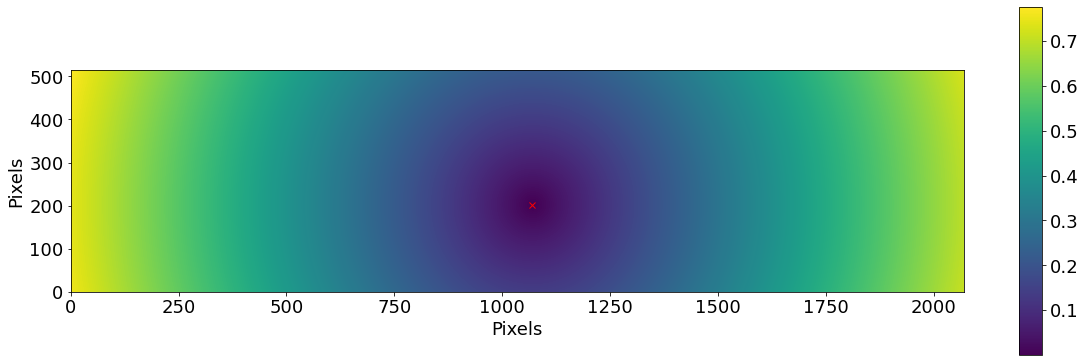

In [158]:
distance = 4.0 # m
photon_energy = 10.0e3 # eV
h = 4.135667696e-15 # eV*s
c = 2.99792458e8 # m/s
wavelength = h*c / photon_energy # m
pix = 55e-6 # m

rs = [0.5*(roi[0]+roi[1])*downsample*pix for roi in rois]
tth = np.arctan2(rs, distance)
q = 4.0e-10 * np.pi / wavelength * np.sin(0.5*tth)
print('wavelength', wavelength)

# make grid
x = np.arange(0,img.shape[1])
y = np.arange(0,img.shape[0])
xx,yy = np.meshgrid(x,y)
r = (((xx-center_x)**2 + (yy-center_y)**2 ) ** 0.5)
rs = r*pix
tth = np.arctan2(rs, distance)
Q = 4.0e-9 * np.pi / wavelength * np.sin(0.5*tth) # 1/nm

# Q-map
plt.figure(figsize=(20,8))
plt.imshow(Q, origin='lower') # 
plt.plot(center_x,center_y,'rx')
plt.xlabel('Pixels', size=18)
plt.ylabel('Pixels', size=18)
plt.tick_params(labelsize=18)
cbar = plt.colorbar(**dict(pad=0.05, shrink=0.8, aspect=15))
cbar.ax.tick_params(labelsize=18)
plt.xlim([0,2069//downsample])
plt.ylim([0,515//downsample])
plt.show()

## NP in dmso in focus

In [159]:
sample = '100NP_dmso'
scans = 7587  # scans to run -- NP in water/DMSO in focus
exp_time1 = 10

roi_img = xpcs.make_roi(center_x, center_y, rois, downsample)
frames1 = xpcs.make_frames('/data/visitors/nanomax/20210623/2021052608/raw/sample/tristan-%04d*' %scans, 
                     exp_time, roi_img, downsample) # 1 s
print('done')

done


## NP in dmso - 1000 um out

In [160]:
sample = '100NP_dmso'
scans = 7607  # scans to run -- NP in water/DMSO 1000um out
exp_time2 = 10

roi_img = xpcs.make_roi(center_x, center_y, rois, downsample)
frames2 = xpcs.make_frames('/data/visitors/nanomax/20210623/2021052608/raw/sample/tristan-%04d*' %scans, 
                     exp_time, roi_img, downsample) # 1 s
print('done')

done


## NP in dmso - 2000 um out

In [161]:
sample = '100NP_dmso'
scans = 7637  # scans to run -- NP in water/DMSO 2000um out
exp_time3 = 10

roi_img = xpcs.make_roi(center_x, center_y, rois, downsample)
frames3 = xpcs.make_frames('/data/visitors/nanomax/20210623/2021052608/raw/sample/tristan-%04d*' %scans, 
                     exp_time, roi_img, downsample) # 1 s
print('done')

done


## display image

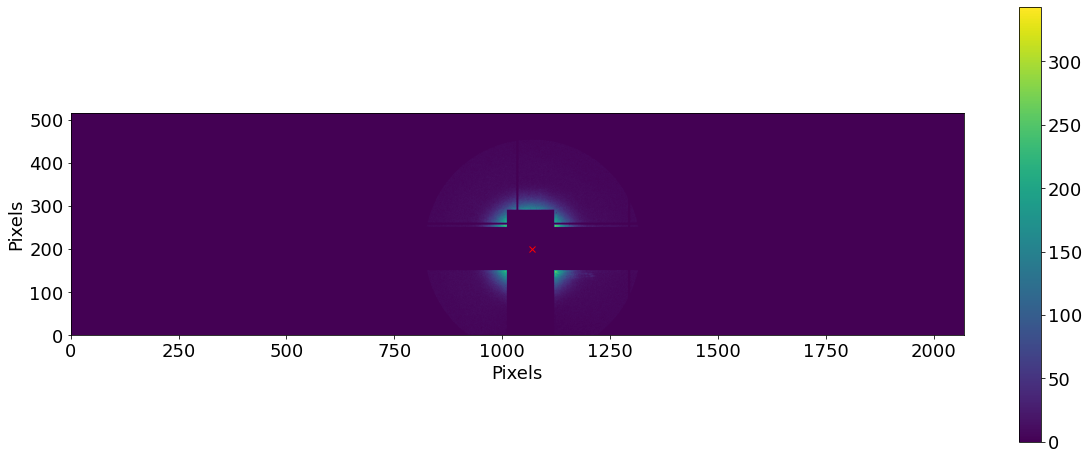

In [162]:
center_x, center_y = 1069.5/downsample, 201.5/downsample

plt.figure(figsize=(20,8))
plt.imshow(img/exp_time, origin='lower') # show ring-masked image
plt.plot(center_x,center_y,'rx')
cbar = plt.colorbar()
plt.xlabel('Pixels', size=18)
plt.ylabel('Pixels', size=18)
plt.tick_params(labelsize=18)
#cbar = plt.colorbar(**dict(pad=0.05, shrink=0.8, aspect=15))
cbar.ax.tick_params(labelsize=18)
plt.xlim([0,2069/downsample])
plt.ylim([0,515/downsample])

plt.show()

## Angular integration

In [163]:
# angular integration parameters
n_bins = 200 // downsample   # number of bins (integration ring thickness)
mask_thr = 0            # threshold limit for integrator
center = center_y, center_x
dpix = downsample*pix

# generate images to integrate
img1 = xpcs.make_img(frames1[0])  
img2 = xpcs.make_img(frames2[0])  
img3 = xpcs.make_img(frames3[0])  

# alternative integration method
#from integrators import *
#qbin1,Iq1 = angular_average(img1,center,roi_img,threshold=mask_thr, nx=n_bins) 
#qbin2,Iq2 = angular_average(img2,center,roi_img,threshold=mask_thr, nx=n_bins) 
#qbin3,Iq3 = angular_average(img3,center,roi_img,threshold=mask_thr, nx=n_bins) 
# convert radius to q
#rs = qbin1*dpix
#tth = np.arctan2(rs, distance)
#q1 = 4.0e-9 * np.pi / wavelength * np.sin(0.5*tth)
#q1 = np.array(q1)

# angular intregation
q, Iq = functions.calc_Iq(Q, img, roi_img, downsample, nbins=200, n_max=250, n_min=center_y, threshold=0) # experimental
q1, Iq1 = functions.calc_Iq(Q, img1, roi_img, downsample, nbins=200, n_max=250, n_min=center_y, threshold=0) # experimental
q2, Iq2 = functions.calc_Iq(Q, img2, roi_img, downsample, nbins=200, n_max=250, n_min=center_y, threshold=0) # experimental
q3, Iq3 = functions.calc_Iq(Q, img3, roi_img, downsample, nbins=200, n_max=250, n_min=center_y, threshold=0) # experimental

print(q[-1])

0.1743012523012097


## Iq - NP in water

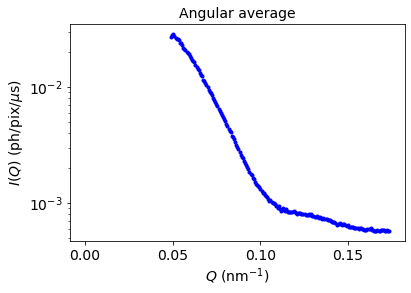

In [164]:
unit = 1e6 

plt.figure()

plt.plot(q[0:-1],Iq[0:-1]/exp_time/unit*1e2,'b.') # per 10x10 superpixel

plt.ylabel(r'$I(Q)$ (ph/pix/$\mu$s)', size=14)
plt.xlabel(r'$Q$ $\rm(nm^{-1})$', size=14)
plt.title('Angular average',size=14)
plt.tick_params(labelsize=14)
#plt.xlim([0.02,0.25])
#plt.ylim([1e-2,300])
plt.yscale('log')
#plt.xscale('log')

plt.show()

## Compare Iq - NP in dmso

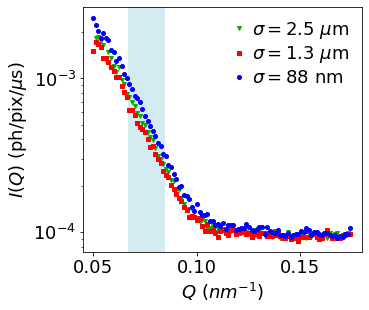

In [165]:
symbol = ['o','s','v']
col = ['b','r',[0,0.7,0]]

# display the results
fig = plt.figure(figsize=[5,4.5])

plt.plot(q3[::2], Iq3[::2]/exp_time/unit*1e2, symbol[2], ms=4, color=col[2], label=r'$\sigma=2.5~\mu$m') # per 10x10 superpixel
plt.plot(q2[::2], Iq2[::2]/exp_time/unit*1e2, symbol[1], ms=4, color=col[1], label=r'$\sigma=1.3~\mu$m') # per 10x10 superpixel
plt.plot(q1[::2], Iq1[::2]/exp_time/unit*1e2, symbol[0], ms=4, color=col[0], label=r'$\sigma=88$ nm') # per 10x10 superpixel
plt.axvspan(0.06688745, 0.08475168, facecolor='lightblue', alpha=0.5)

plt.ylabel('$I(Q)$ (ph/pix/$\mu$s)',size=18) # per 10x10 superpixel
plt.xlabel('$Q ~(nm^{-1})$',size=18)
#plt.grid(True, which='major', axis='both')
#plt.grid(True, which='minor', axis='both', linestyle=':')
plt.tick_params(labelsize=18)
plt.legend(loc='upper right', frameon=False, prop={'size': 18}, labelspacing=0.2, handletextpad=0.2, handlelength=1.0, borderpad=0.2);
plt.yscale('log')
plt.xlim([4.5e-2,18e-2])

#plt.savefig('Iq_compare_beam_size_dmso_'+'_'+str(downsample)+'x'+str(downsample)+'_'+str(exp_time)+'s.png', dpi=300, bbox_inches='tight',) # save plot

plt.show()

## Save Iq data

In [153]:
pwd

'/mxn/visitors/sharonb/jupyter_notebooks'

In [154]:
#!{sys.executable} -m pip install astropy
from astropy.io import ascii
from astropy.table import Table

In [140]:
t = Table()

t['q'] = q[1:] 
t['Iq0'] = Iq[1:]/exp_time
t['Iq1'] = Iq1[1:]/exp_time
t['Iq2'] = Iq2[1:]/exp_time
t['Iq3'] = Iq3[1:]/exp_time

t.meta['comments'] = {'This file was created Wed 29 Jun 2022 \n'
                      '# Created by Sharon Berkowicz \n'
                      '# \n'
                      '# Description: Angularly integrated scattering intensity versus momentum transfer for 100 nm silica nanoparticles (NP) in water and 33 mol% dmso-water solution for different sample positions relative to the nanofocus. \n'
                      '# \n'
                      '# Momentum transfer q [nm^-1] \n'
                      '# Scattering intensity Iq [photons/pixel/s] \n'
                      '# \n'
                      '# Samples | Sample position: \n'
                      '# Iq0 - NP in Water | Focal plane \n'
                      '# Iq1 - NP in dmso-water | Focal plane \n'
                      '# Iq2 - NP in dmso-water | 1000 um out \n'
                      '# Iq3 - NP in dmso-water | 2000 um out \n'
                      '# \n'
                     }

ascii.write(t, 'Iq_values.dat', overwrite=True, format='fixed_width', delimiter=' ', 
            formats={'q': '%.6f', 'Iq0': '%.6f', 'Iq1': '%.6f', 'Iq2': '%.6f', 'Iq3': '%.6f' }) 
ascii.FixedWidth(col_starts=None, col_ends=None, delimiter_pad=' ', bookend=True)
